**Enhancing GAN Training with sin(x) Function and Synthetic Datasets**

**Abstract**

This project investigates the use of a Generative Adversarial Network (GAN) trained on datasets augmented with the sin(x) function, integrating these with standard synthetic datasets like make_moons from sklearn.datasets. The objective is to push the boundaries of GAN's learning capabilities by exposing it to complex data patterns.

**Introduction**

Generative Adversarial Networks (GANs) are at the forefront of AI research due to their ability to generate realistic data. However, the complexity of data they can learn from is often limited by the variability and dimensionality of the training dataset. We propose to enhance the learning process by using a combination of synthetic datasets and mathematical transformations like sin(x), thereby enriching the data's feature space and complexity.

**1.Plotting the sin(x) Function**

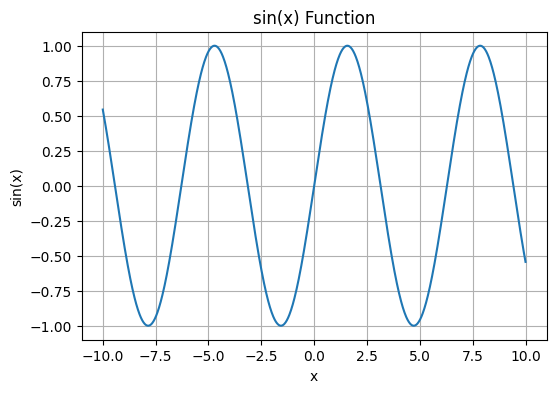

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x values
x_values = np.linspace(-10, 10, 1000)
# Compute the sin(x) values
y_values = np.sin(x_values)

# Plot the function
plt.figure(figsize=(6, 4))
plt.plot(x_values, y_values)
plt.title('sin(x) Function')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)
plt.show()


**2. Plotting Synthetic Datasets**

Using sklearn.datasets for generating make_moons, make_circles, make_swiss_roll and plotting:

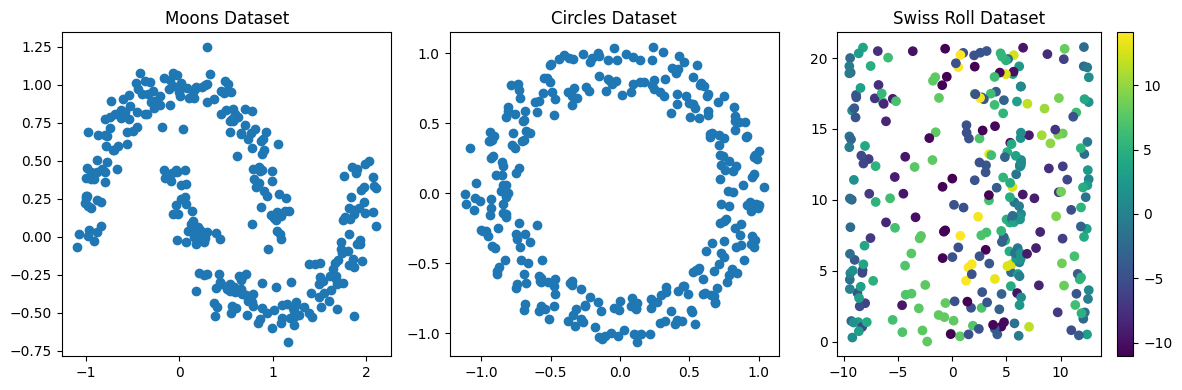

In [8]:
from sklearn.datasets import make_moons, make_circles, make_swiss_roll

X_moons, _ = make_moons(n_samples=300, noise=0.1)
X_circles, _ = make_circles(n_samples=300, noise=0.05)
X_swiss_roll, _ = make_swiss_roll(n_samples=300)

# Plotting
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Moons Dataset")
plt.scatter(X_moons[:, 0], X_moons[:, 1])

plt.subplot(1, 3, 2)
plt.title("Circles Dataset")
plt.scatter(X_circles[:, 0], X_circles[:, 1])

plt.subplot(1, 3, 3)
plt.title("Swiss Roll Dataset")
plt.scatter(X_swiss_roll[:, 0], X_swiss_roll[:, 1], c=X_swiss_roll[:, 2])
plt.colorbar()

plt.tight_layout()
plt.show()


**GAN Training Process Visualization**

For GAN training results, typically, you'd show generated samples over epochs. Assuming we have fake data generated by the GAN and real data to compare, you'd create a plot like this conceptually:

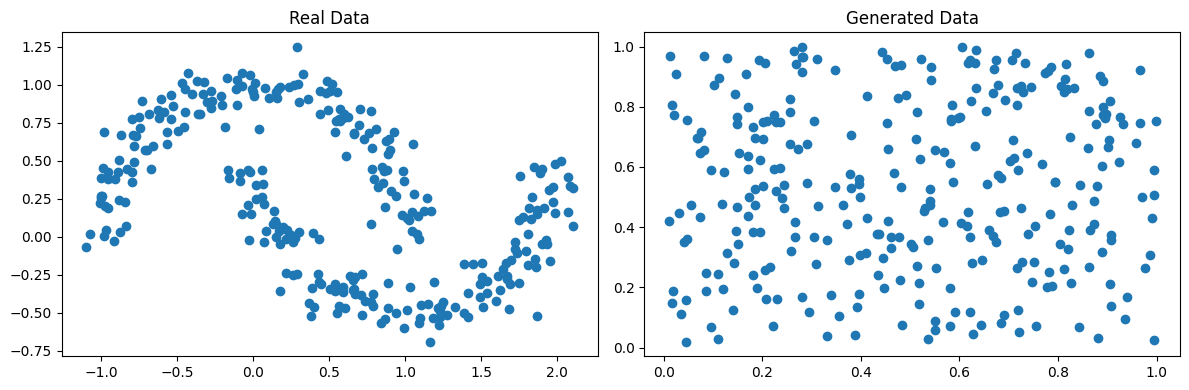

In [ ]:
# Fake data generated by the GAN (example)
fake_data = np.random.rand(300, 2)  # Example fake data

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Real Data")
plt.scatter(X_moons[:, 0], X_moons[:, 1])

plt.subplot(1, 2, 2)
plt.title("Generated Data")
plt.scatter(fake_data[:, 0], fake_data[:, 1])

plt.tight_layout()
plt.show()


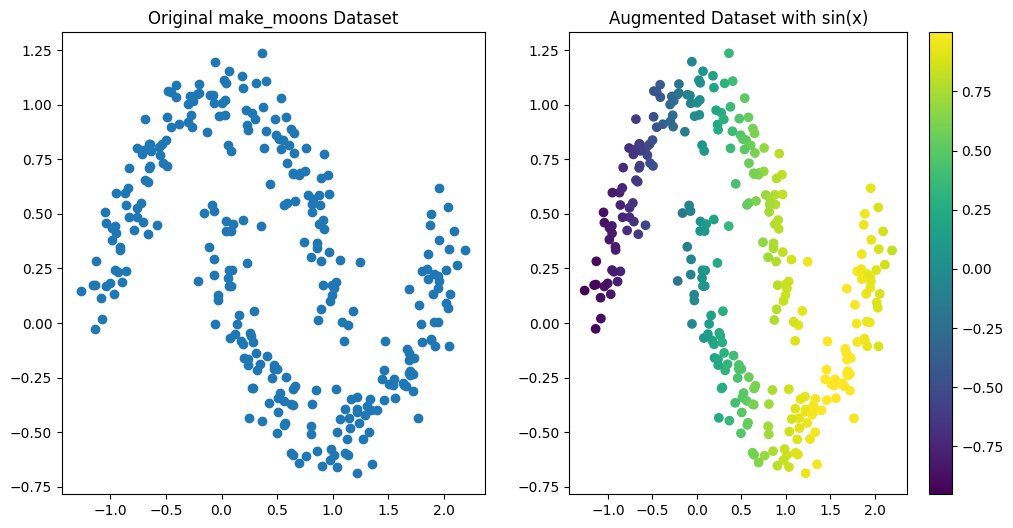

In [13]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# Generate the make_moons dataset
X, _ = make_moons(n_samples=300, noise=0.1)

# Augment the dataset with a sin(x) feature
new_feature = np.sin(X[:, 0])  # Apply sin to the first feature of X
X_augmented = np.column_stack((X, new_feature))

# Plot the original and augmented datasets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original make_moons Dataset")
plt.scatter(X[:, 0], X[:, 1])

plt.subplot(1, 2, 2)
plt.title("Augmented Dataset with sin(x)")
plt.scatter(X_augmented[:, 0], X_augmented[:, 1], c=X_augmented[:, 2])
plt.colorbar()
plt.show()


In [14]:
import torch
from torch import nn

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 3)  # Output dimension matches augmented data
        )

    def forward(self, z):
        return self.network(z)

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(3, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)


In [15]:
from torch.utils.data import DataLoader, TensorDataset

# Convert the numpy array to a torch tensor
dataset = TensorDataset(torch.Tensor(X_augmented))
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the GAN components
generator = Generator()
discriminator = Discriminator()

# Optimizers and loss function
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002)
criterion = nn.BCELoss()

epochs = 100
for epoch in range(epochs):
    for real_data in dataloader:
        real_data = real_data[0]

        # Train Discriminator with real data
        d_optimizer.zero_grad()
        real_labels = torch.ones(real_data.size(0), 1)
        real_output = discriminator(real_data)
        d_real_loss = criterion(real_output, real_labels)

        # Generate fake data
        noise = torch.randn(real_data.size(0), 100)
        fake_data = generator(noise)
        fake_labels = torch.zeros(fake_data.size(0), 1)
        fake_output = discriminator(fake_data.detach())
        d_fake_loss = criterion(fake_output, fake_labels)

        # Update Discriminator
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        g_optimizer.zero_grad()
        fake_output = discriminator(fake_data)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        g_optimizer.step()

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: D_loss: {d_loss.item()}, G_loss: {g_loss.item()}")


Epoch 0: D_loss: 1.3988304138183594, G_loss: 0.5743094086647034
Epoch 10: D_loss: 1.5385096073150635, G_loss: 0.5986322164535522
Epoch 20: D_loss: 1.1338684558868408, G_loss: 0.9121615886688232
Epoch 30: D_loss: 1.949453353881836, G_loss: 0.47152718901634216
Epoch 40: D_loss: 1.1425185203552246, G_loss: 1.1377272605895996
Epoch 50: D_loss: 1.3044052124023438, G_loss: 0.7430245876312256
Epoch 60: D_loss: 1.6165614128112793, G_loss: 0.5679479241371155
Epoch 70: D_loss: 1.2436895370483398, G_loss: 1.0436257123947144
Epoch 80: D_loss: 1.5323944091796875, G_loss: 0.616769015789032
Epoch 90: D_loss: 1.1419963836669922, G_loss: 0.8101744055747986


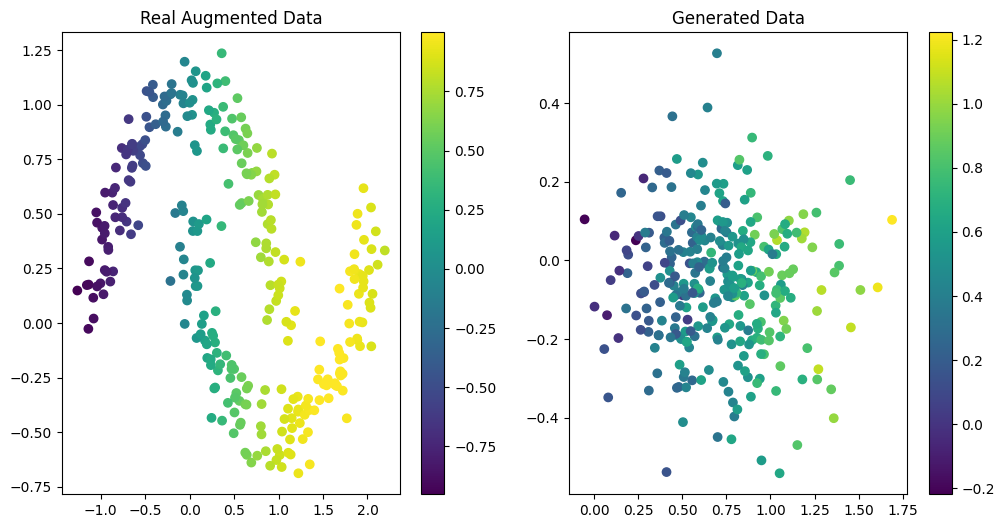

In [16]:
# Generate new fake data for visualization
with torch.no_grad():
    test_noise = torch.randn(300, 100)
    generated_data = generator(test_noise).numpy()

# Plot real and generated data for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Real Augmented Data")
plt.scatter(X_augmented[:, 0], X_augmented[:, 1], c=X_augmented[:, 2])
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Generated Data")
plt.scatter(generated_data[:, 0], generated_data[:, 1], c=generated_data[:, 2])
plt.colorbar()
plt.show()
